# Data Cleaning Appendix

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
import geopandas as gps
from shapely.geometry import Point,Polygon
import contextily as ctx
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import scipy.stats as sp
from scipy.stats.mstats import spearmanr

### Import Datasets

In [2]:
crashCases = pd.read_csv('nyc-motor-vehicle-crashes.csv')
crashIndividuals = pd.read_csv('nyc-motor-vehicle-person.csv')
crashVehicles = pd.read_csv('nyc-motor-vehicle-vehicle.csv')

### The [CrashCases] Dataset

In [3]:
crashCases.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,03/05/2021,23:30,NaN,NaN,NaN,NaN,NaN,WILLIAMSBURG BRIDGE INNER ROADWA,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4396854,Sedan,Sedan,NaN,NaN,NaN
1,03/04/2021,16:15,MANHATTAN,10026.0,NaN,NaN,NaN,NaN,NaN,235 W 115 Street,...,NaN,NaN,NaN,NaN,4396406,Sedan,NaN,NaN,NaN,NaN
2,03/03/2021,0:00,MANHATTAN,10035.0,NaN,NaN,NaN,NaN,NaN,1 RANDALLS ISLAND,...,NaN,NaN,NaN,NaN,4396219,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
3,03/03/2021,16:30,NaN,NaN,NaN,NaN,NaN,MEEKER AVENUE,VANDERVORT AVENUE,NaN,...,Passing or Lane Usage Improper,NaN,NaN,NaN,4396071,Sedan,Box Truck,NaN,NaN,NaN
4,03/02/2021,23:40,BRONX,10451.0,NaN,NaN,NaN,EAST 138 STREET,MAJOR DEEGAN EXPRESSWAY,NaN,...,NaN,NaN,NaN,NaN,4395866,Sedan,NaN,NaN,NaN,NaN


### The [CrashIndividuals] Dataset

In [4]:
crashIndividuals.head()

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,PERSON_AGE,EJECTION,...,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,PED_LOCATION,PED_ACTION,COMPLAINT,PED_ROLE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,PERSON_SEX
0,7277228,3818793,01/01/2018,10:15,c53cd1a8-42cc-4f47-a87b-02a32b1d2bf2,Occupant,Unspecified,17674474.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,U
1,7278332,3822309,01/01/2018,12:30,986f51de-9a01-4bff-a381-c1c8e7b96e49,Occupant,Unspecified,17675026.0,41.0,Not Ejected,...,Does Not Apply,Driver,Lap Belt & Harness,NaN,NaN,Does Not Apply,Driver,NaN,NaN,F
2,7277098,3822272,01/01/2018,1:00,fdc25d2d-51bd-4f3a-8041-5a351ab1eed7,Occupant,Unspecified,17674407.0,35.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,M
3,7279381,3821721,01/01/2018,12:00,94a05727-db8c-415a-8f74-309715164226,Occupant,Unspecified,17675520.0,13.0,Not Ejected,...,Does Not Apply,"Middle rear seat, or passenger lying across a ...",Lap Belt,NaN,NaN,Does Not Apply,Passenger,NaN,NaN,F
4,7281576,3820861,01/01/2018,16:00,d52c67d5-730d-4153-9274-56627e456ec7,Occupant,Unspecified,17676604.0,48.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,F


### The [CrashVehicles] Dataset

In [5]:
crashVehicles.head()

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,VEHICLE_ID,STATE_REGISTRATION,VEHICLE_TYPE,VEHICLE_MAKE,VEHICLE_MODEL,VEHICLE_YEAR,...,PRE_CRASH,POINT_OF_IMPACT,VEHICLE_DAMAGE,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PUBLIC_PROPERTY_DAMAGE,PUBLIC_PROPERTY_DAMAGE_TYPE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2
0,17675653,3824399,01/01/2018,17:40,efc151a7-442b-4a8e-b669-2121c19a4119,NaN,NaN,NaN,NaN,NaN,...,Going Straight Ahead,NaN,NaN,NaN,NaN,NaN,Unspecified,NaN,NaN,NaN
1,17675094,3820775,01/01/2018,0:01,41bf537e-a685-483c-90fb-6c637b772e3b,NY,Taxi,GMC -CAR/SUV,NaN,2016.0,...,Parked,Left Front Quarter Panel,Left Rear Quarter Panel,No Damage,No Damage,No Damage,N,NaN,Unspecified,Unspecified
2,17674184,3819574,01/01/2018,3:30,31d33a1f-1654-4495-b7d7-7c9ab17f8e96,NY,Station Wagon/Sport Utility Vehicle,JEEP -CAR/SUV,NaN,2014.0,...,Going Straight Ahead,Right Rear Quarter Panel,Right Side Doors,NaN,NaN,NaN,N,NaN,Unspecified,Unspecified
3,17674943,3818864,01/01/2018,14:50,aab7937f-0b6d-4744-a274-b4f636b4b6a4,NY,Station Wagon/Sport Utility Vehicle,BMW -CAR/SUV,NaN,2017.0,...,Parked,Left Front Bumper,Left Front Bumper,Left Front Quarter Panel,Left Side Doors,No Damage,N,NaN,Unspecified,Unspecified
4,17674640,3819262,01/01/2018,15:00,81a72724-6dcf-4eac-ae7a-b0726cefd39f,NY,Sedan,INFI -CAR/SUV,NaN,2007.0,...,Going Straight Ahead,Center Front End,Center Front End,Left Front Bumper,Right Front Bumper,NaN,N,NaN,Unspecified,Unspecified


In [6]:
print("Number of Instances of the [crashCases] DataFrame:", crashCases.size)
print("Number of Instances of the [crashIndividuals] DataFrame:", crashIndividuals.size)
print("Number of Instances of the [crashVehicles] DataFrame:", crashVehicles.size)

Number of Instances of the [crashCases] DataFrame: 16572688
Number of Instances of the [crashIndividuals] DataFrame: 47604585
Number of Instances of the [crashVehicles] DataFrame: 28891450


## Part I: Handling Missing Data

### Replacing NaNs in Numerical Columns with Column Mean

In [7]:
def replaceMean(df):
    dfNumeric = df.copy()._get_numeric_data()
    filteredMeans = dfNumeric.mean()
    i = 0
    for col in df._get_numeric_data():
        df[col].fillna(filteredMeans[i], inplace=True)
        i = i + 1

In [8]:
def replaceMeanTest(df):
    dfNumeric = df.copy()._get_numeric_data()
    for col in dfNumeric.columns:
        assert df[col].isnull().sum() == 0

In [9]:
# Replace missing data in numerical columns with the mean of elements in the column
replaceMean(crashCases)
replaceMean(crashIndividuals)
replaceMean(crashVehicles)

# Test if all NaNs are replaced in numerical columns of [crashCases]
replaceMeanTest(crashCases) and replaceMeanTest(crashIndividuals) and replaceMeanTest(crashVehicles)

### Fill NaNs in Categorical Columns

In [10]:
crashCases = crashCases.fillna('NOT AVAILABLE')
crashIndividuals = crashIndividuals.fillna('NOT AVAILABLE')
crashVehicles = crashVehicles.fillna('NOT AVAILABLE')
# assert whether the [crashCases] DataFrame contains any NaNs after the above removal
def assertNull(df):
    for col in df.columns:
        assert df[col].isnull().sum() == 0
print(assertNull(crashCases) and assertNull(crashIndividuals) and assertNull(crashVehicles))

None


## Part II: Structuring Data

In [11]:
# Replacing Spaces in [crashCases] with Underscores to achieve consistency across the datasets
crashCases.columns = crashCases.columns.str.replace('\s+','_')

# Test for whether column names are distinct
def isColNamesDistinct(df):
    dfLower = df.copy()
    dfLower.columns = [col.lower() for col in dfLower.columns] # lowercase all column names
    containsDups = sorted(list(set(dfLower.columns))) != sorted(dfLower.columns)
    print(containsDups)
    assert(not containsDups), 'There exist columns that, based on their name, potentially represent the same variable!'

assert not isColNamesDistinct(crashCases) and not isColNamesDistinct(crashIndividuals) and not isColNamesDistinct(crashVehicles)

False
False
False


We now test for outliers by constructing a boxplot for the numerical columns in all three data sets, since outliers stand out when the data is plotted as a boxplot.

Numerical Columns: Index(['ZIP_CODE', 'LATITUDE', 'LONGITUDE', 'NUMBER_OF_PERSONS_INJURED',
       'NUMBER_OF_PERSONS_KILLED', 'NUMBER_OF_PEDESTRIANS_INJURED',
       'NUMBER_OF_PEDESTRIANS_KILLED', 'NUMBER_OF_CYCLIST_INJURED',
       'NUMBER_OF_CYCLIST_KILLED', 'NUMBER_OF_MOTORIST_INJURED',
       'NUMBER_OF_MOTORIST_KILLED', 'COLLISION_ID'],
      dtype='object')


Text(0, 0.5, 'Number of People Affected')

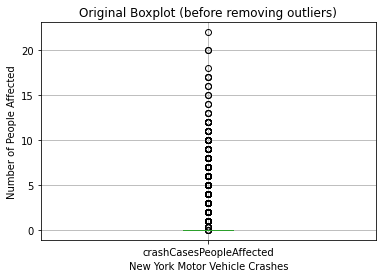

In [12]:
# Test for outliers
crashCasesNumeric = crashCases.copy()._get_numeric_data()
print('Numerical Columns:', crashCasesNumeric.columns)
crashCasesNumeric.loc[:,'crashCasesPeopleAffected'] = crashCases['NUMBER_OF_PERSONS_INJURED'] + crashCases['NUMBER_OF_PERSONS_KILLED']
crashCasesNumeric.boxplot('crashCasesPeopleAffected')
plt.title('Original Boxplot (before removing outliers)')
plt.xlabel('New York Motor Vehicle Crashes')
plt.ylabel('Number of People Affected')

We now remove the instances in the dataset that correspond to such outliers, and confirm the removal by replotting the boxplot above, but this time, with outliers removed -- chosen to be the extreme 1% from each end of the data.

    CRASH_DATE CRASH_TIME        BOROUGH      ZIP_CODE   LATITUDE  LONGITUDE  \
6   03/01/2021      11:03  NOT AVAILABLE  10879.202855  40.667599 -73.819275   
10  12/16/2020      22:45  NOT AVAILABLE  10879.202855  40.667599 -73.819275   
11  02/26/2021       8:55  NOT AVAILABLE  10879.202855  40.667599 -73.819275   
13  02/25/2021      15:20  NOT AVAILABLE  10879.202855  40.667599 -73.819275   
14  02/25/2021      17:45  NOT AVAILABLE  10879.202855  40.689194 -73.753650   

                  LOCATION                    ON_STREET_NAME  \
6            NOT AVAILABLE                     NOT AVAILABLE   
10           NOT AVAILABLE  SOUTH CONDUIT AVENUE               
11           NOT AVAILABLE  STATEN ISLAND EXPRESSWAY           
13           NOT AVAILABLE  HORACE HARDING EXPRESSWAY          
14  (40.689194, -73.75365)  120 AVENUE                         

   CROSS_STREET_NAME                           OFF_STREET_NAME  ...  \
6      NOT AVAILABLE  FRONT OF 410 STREET                      

Text(0, 0.5, 'Number of People Affected')

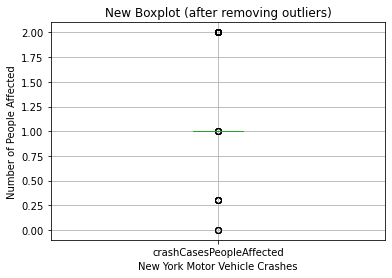

In [13]:
thresholdLow = crashCasesNumeric['crashCasesPeopleAffected'].quantile(0.01)
thresholdHigh = crashCasesNumeric['crashCasesPeopleAffected'].quantile(0.99)
# filters data by removing the extreme motor crash cases
crashCases = crashCases[(crashCases['NUMBER_OF_PERSONS_INJURED'] + crashCases['NUMBER_OF_PERSONS_KILLED'] > thresholdLow) &
                        (crashCases['NUMBER_OF_PERSONS_INJURED'] + crashCases['NUMBER_OF_PERSONS_KILLED'] < thresholdHigh)]
print(crashCases.head())
crashCasesCopy = crashCases.copy()
crashCasesCopy.loc[:,'crashCasesPeopleAffected'] = crashCasesCopy['NUMBER_OF_PERSONS_INJURED'] + crashCasesCopy['NUMBER_OF_PERSONS_KILLED']
crashCasesCopy.boxplot('crashCasesPeopleAffected')
plt.title('New Boxplot (after removing outliers)')
plt.xlabel('New York Motor Vehicle Crashes')
plt.ylabel('Number of People Affected')

## Part III: Transform the 'YEAR' and 'VEHICLE_YEAR' Columns to a DateTime Object

In [14]:
crashCases['CRASH_DATE'] = pd.to_datetime(crashCases['CRASH_DATE'], format='%m/%d/%Y', errors='ignore')
assert crashCases['CRASH_DATE'].dtype == 'datetime64[ns]'
crashIndividuals['CRASH_DATE'] = pd.to_datetime(crashIndividuals['CRASH_DATE'], format='%m/%d/%Y', errors='ignore')
assert crashIndividuals['CRASH_DATE'].dtype == 'datetime64[ns]'
crashVehicles['CRASH_DATE'] = pd.to_datetime(crashVehicles['CRASH_DATE'], format='%m/%d/%Y', errors='ignore')
assert crashVehicles['CRASH_DATE'].dtype == 'datetime64[ns]'
crashVehicles['VEHICLE_YEAR'] = pd.to_datetime(crashVehicles['VEHICLE_YEAR'], format='%Y', errors='ignore')
assert crashVehicles['VEHICLE_YEAR'].dtype == 'int64'

## Part IV: Joining the Datasets by CollisionID

In [15]:
crashData = pd.merge(crashCases,crashIndividuals,on='COLLISION_ID')
crashData = pd.merge(crashData,crashVehicles,on='COLLISION_ID')
assert crashCases.columns.size + crashIndividuals.columns.size + crashVehicles.columns.size - 2 == crashData.columns.size # assert whether the merges are successful

*Note that throughout this project, we will use the [crashData] dataset only when we are using information that requires data across the original three datasets. This is for efficiency purposes, so that we do not always operate on a large dataset when unnecessary.*

## Part V: Writing Cleaned DataFrames as .csv Files

In [17]:
crashCases.to_csv('crashCasesCleaned.csv', index=False)
crashIndividuals.to_csv('crashIndividualsCleaned.csv', index=False)
crashVehicles.to_csv('crashVehiclesCleaned.csv', index=False)
crashCasesCopy.to_csv('crashCasesCopy.csv', index=False)
crashData.to_csv('crashData.csv', index=False)